<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Precipitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install willow

     |████████████████████████████████| 106 kB 24.4 MB/s 


Se importan las librerías a utilizar

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler

Se leen los archivo con los datos de registros de Precipitación en México y se guardan en un diccionario. También se lee el archivo con los datos de las temperaturas a nivel nacional

In [2]:
Prec = {}

for i in range(1985, 2021):
  url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/Precipitacion/%dPrecip.xls?raw=true" % i
  if (i==2020):
    url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/Precipitacion/2020Precip.xlsx?raw=true"
  Prec[i] = pd.read_excel(url, header=1)

url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/raw/main/Data/Temperaturas%20Completo%20por%20Entidad.csv"
temperaturas = pd.read_csv(url) 

Se crea un dataframe por estado para guardar los datos de las precipitaciones de cada uno de estos

In [3]:
#Se guardan las abreviaturas de los estados en una lista
estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']

#Se guardan en una lista los nombres de los estados tal y como vienen en el archivo inicial.
df = pd.DataFrame(Prec[1985])
estados_comp = df['ENTIDAD'].tolist()

anios = range(1985, 2021) #Lista con los años de los dataframe
prec_por_entidad = {}

#Ciclo para guardar los datos de cada estado.
for i in range(33):
  df_prec_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL']) #Dataframe en el que se guardará los datos de un solo estado.
  
  for j in range (1985, 2021):
    l = j - 1985 #Variable para guardar el año
   
    df = pd.DataFrame (Prec[j])    
   
    df_prec_entidad = df_prec_entidad.append(df.loc[i], ignore_index=True) #Se copia la fila con los datos del estado correspondiente al nuevo dataframe
   
    df_prec_entidad.at[l, 'ENTIDAD'] = anios[l] #Se guarda el número del año correspondiente en el dataframe

  df_prec_entidad.rename(columns = {'ENTIDAD':'ANIO'}, inplace = True)

  prec_por_entidad[estados_abv[i]] = df_prec_entidad #Se guarda en el diccionario de las precipitaciones por entidad el dataframe creado en el ciclo, identificado por la abreviatura de la entidad


Ejemplos de los dataframes por estado creados

In [4]:
print (prec_por_entidad['SIN'].head())
print (prec_por_entidad['NAC'].head())

   ANIO         ENE        FEB  ...        NOV        DIC       ANUAL
0  1985  115.571741   2.408146  ...  10.298417  24.479841  792.539359
1  1986    7.892790  21.807251  ...   6.322164  28.588047  646.298723
2  1987   13.832147  22.053572  ...   9.760709  35.577609  519.847907
3  1988    6.278637   2.657400  ...   7.129536  25.565632  613.807323
4  1989   20.527490  15.374581  ...  27.021390  29.223355  628.988733

[5 rows x 14 columns]
   ANIO   ENE   FEB   MAR   ABR   MAY  ...    AGO    SEP   OCT   NOV   DIC  ANUAL
0  1985  36.0  16.5  15.0  37.2  51.5  ...  118.8  106.1  65.5  31.9  25.4  770.6
1  1986  15.2  14.9  10.7  26.3  57.4  ...  103.8  125.2  83.0  36.8  36.2  748.0
2  1987  20.1  22.0  16.8  21.8  52.6  ...  113.8  104.1  32.1  28.2  23.8  689.2
3  1988  20.2  13.2  17.7  21.7  24.8  ...  173.8  123.8  49.7  17.9  18.8  765.6
4  1989  22.5  12.7   9.7  14.0  26.1  ...  158.9  124.1  52.4  34.6  41.1  691.8

[5 rows x 14 columns]


Se crea un dataframe con todos los datos de precipitación

In [5]:
df_completo = pd.DataFrame(columns=["ANIO", "MES", "ENTIDAD", "Precipitacion"])

#Se guardan las abreviaturas de los estados en una lista
estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']

#Se guardan las abreviaturas de los meses en una lista
df = Prec[1985]
meses_abv = df.columns.values.tolist()
meses_abv.remove("ENTIDAD")

for i in range(1985, 2021):
  df = Prec[i]

  for j in meses_abv:
    m = 0 #Variable para acceder a las filas de los dataframes (una por entidad)
    for k in estados_abv:
 
      #Se copia la precipitación media correspondiente a la entidad, mes y año, donde j es el mes y m la fila de la entidad 
      lluvia = df.at[m, j]

      #Se adjuntan al dataframe con los datos completos el año, mes, entidad y precipitación media correspondientes
      df_completo = df_completo.append({"ANIO": i, "MES": j, "ENTIDAD": k, "Precipitacion": lluvia}, ignore_index=True)

      m += 1
     
print (df_completo)

       ANIO    MES ENTIDAD  Precipitacion
0      1985    ENE     AGU       4.914729
1      1985    ENE     BCN      12.150562
2      1985    ENE     BCS      30.304723
3      1985    ENE     CAM      20.943153
4      1985    ENE     CHP      40.714546
...     ...    ...     ...            ...
15439  2020  ANUAL     TLA     538.400000
15440  2020  ANUAL     VER    1548.600000
15441  2020  ANUAL     YUC    1802.200000
15442  2020  ANUAL     ZAC     406.300000
15443  2020  ANUAL     NAC     722.500000

[15444 rows x 4 columns]


Se combinan en un dataframe los datos de temperaturas con los datos de precipitación

In [6]:
#Se guarda la columna correspondiente a la precipitación media del dataframe creado en la función anterior en una lista, para adjuntarla al dataframe con las temperaturas
lluvias = df_completo['Precipitacion'].tolist()

df = temperaturas
#Se adjunta la columna con los datos de precipitación media
df['Precipitacion'] = lluvias

print(df)

       ANIO    MES ENTIDAD      T_Max      T_Min      T_Med  Precipitacion
0      1985    ENE     AGU  20.712779   3.221408  11.967094       4.914729
1      1985    ENE     BCN  17.562808   4.541772  11.052290      12.150562
2      1985    ENE     BCS  22.659097   8.745975  15.702536      30.304723
3      1985    ENE     CAM  29.954718  15.909566  22.932142      20.943153
4      1985    ENE     CHP  15.060987   1.816757   8.438872      40.714546
...     ...    ...     ...        ...        ...        ...            ...
15439  2020  ANUAL     TLA  23.500000   7.100000  15.300000     538.400000
15440  2020  ANUAL     VER  28.800000  17.800000  23.300000    1548.600000
15441  2020  ANUAL     YUC  33.400000  21.200000  27.300000    1802.200000
15442  2020  ANUAL     ZAC  27.200000   9.400000  18.300000     406.300000
15443  2020  ANUAL     NAC  30.100000  14.900000  22.400000     722.500000

[15444 rows x 7 columns]


Análisis de las precipitaciones (distribución de las precipitactiones máximas)

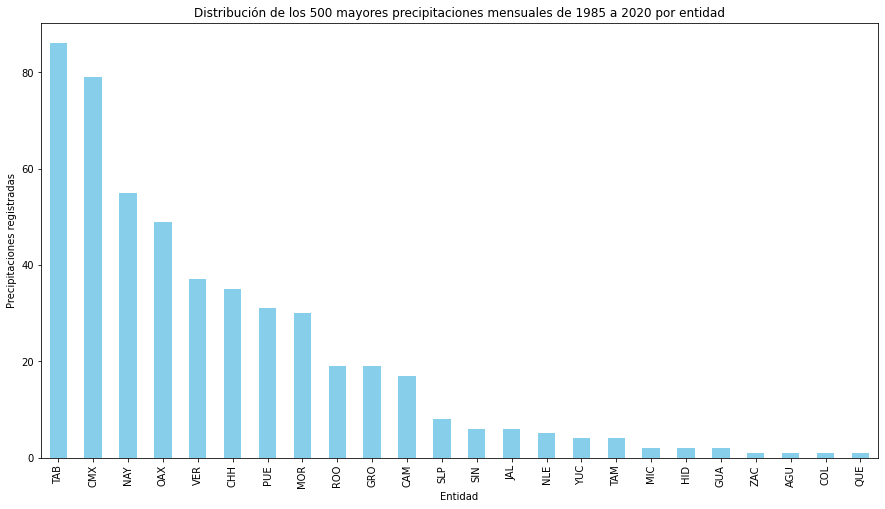

In [22]:
dfmax = df[['ANIO', 'MES', 'ENTIDAD', 'Precipitacion']]

dfmax = dfmax[dfmax['MES']!='ANUAL']
dfmax = dfmax[dfmax['ENTIDAD']!='NAC']

dfmax = dfmax.nlargest(500, ['Precipitacion'])

plt.figure(figsize = (15, 8))

dfmax['ENTIDAD'].value_counts().plot(kind = 'bar', color = 'skyblue')

plt.xlabel('Entidad')
plt.ylabel('Precipitaciones registradas')
plt.title('Distribución de los 500 mayores precipitaciones mensuales de 1985 a 2020 por entidad')

plt.savefig('Distribución de los 500 mayores precipitaciones mensuales de 1985 a 2020 por entidad.jpg')

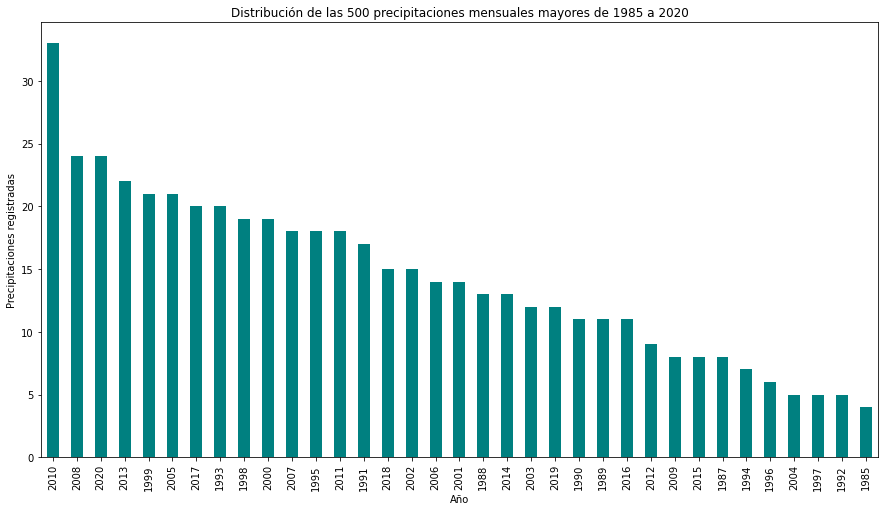

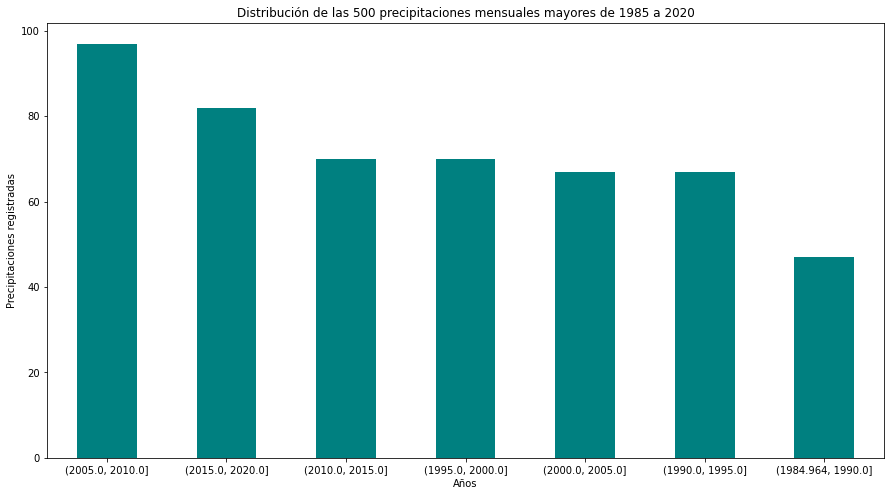

In [26]:
plt.figure(figsize = (15, 8))

dfmax['ANIO'].value_counts().plot(kind = 'bar', color = 'teal')
plt.xlabel('Año')
plt.ylabel('Precipitaciones registradas')
plt.title('Distribución de las 500 precipitaciones mensuales mayores de 1985 a 2020')

plt.savefig('Distribución de las 500 precipitaciones mensuales mayores de 1985 a 2020.jpg')

plt.figure(figsize = (15, 8))

dfmax['ANIO'].value_counts(bins = 7).plot(kind = 'bar', color = 'teal')
plt.xlabel('Años')
plt.xticks(rotation='horizontal')
plt.ylabel('Precipitaciones registradas')
plt.title('Distribución de las 500 precipitaciones mensuales mayores de 1985 a 2020')

plt.savefig('Distribución de las 500 precipitaciones mensuales mayores por lustro de 1985 a 2020.jpg')

Se encuentra la correlación entre la temperatura media y la precipitación nacional

                  T_Med  Precipitacion
T_Med          1.000000       0.664247
Precipitacion  0.664247       1.000000


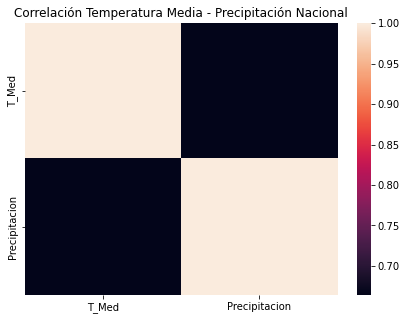

In [15]:
df1 = df[['ANIO', 'MES', 'ENTIDAD', 'T_Med', 'Precipitacion']]

df1 = df1[df1['MES']!='ANUAL']
df1 = df1[df1['ENTIDAD']=='NAC']
df1 = df1.drop(columns={'ENTIDAD'})
df1 = df1.set_index('ANIO', drop = True)

c = df1.corr()
print(c)

plt.figure(figsize=(7, 5))
sns.heatmap(c)
plt.title ("Correlación Temperatura Media - Precipitación Nacional")
plt.savefig("Correlación Temperatura Media - Precipitación Nacional.jpg")

Se crea un modelo de regresión lineal entre la temperatura media y la precipitación

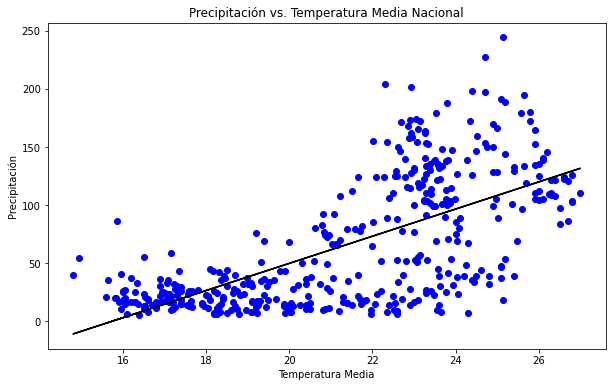

In [16]:
X = df1[['T_Med']]
y = df1['Precipitacion']
regressor = LinearRegression()
regressor.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo')
plt.plot(X, regressor.predict(X), '-k')
plt.xlabel('Temperatura Media')
plt.ylabel('Precipitación')
plt.title('Precipitación vs. Temperatura Media Nacional')

plt.savefig('Precipitación vs. Temperatura Media Nacional.jpg')

Modelo de regresión con el dataframe normalizado

Text(0.5, 1.0, 'Precipitación vs. Temperatura Media Nacional')

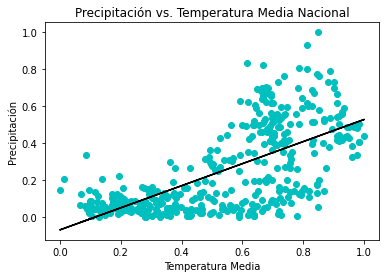

In [ ]:
scaler = MinMaxScaler()
df2 = df1[['T_Med', 'Precipitacion']]

normalized_df=(df2-df2.min())/(df2.max()-df2.min())

X = normalized_df[['T_Med']]
y = normalized_df['Precipitacion']
regressor = LinearRegression()
regressor.fit(X, y)

plt.plot(X, y, 'co')
plt.plot(X, regressor.predict(X), '-k')
plt.xlabel('Temperatura Media')
plt.ylabel('Precipitación')
plt.title('Precipitación vs. Temperatura Media Nacional')

Se descarga el dataframe con los datos de precipitación junto a los de temperaturas

In [ ]:
df.to_csv("Temperaturas+Precipitación.csv", encoding='utf-8', index=False)
from google.colab import files
files.download("Temperaturas+Precipitación.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>